In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfx=pd.read_csv("weightedX.csv")
dfy=pd.read_csv("weightedY.csv")
X=dfx.values
Y=dfy.values

In [3]:
X=(X-X.mean())/(X.std())

In [4]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


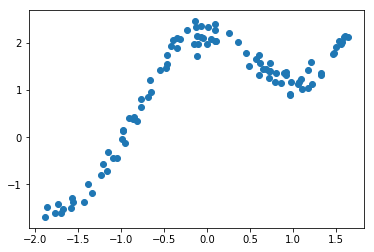

In [5]:
plt.scatter(X,Y)

In [6]:
def getW(query_point,X,tau):
    m=X.shape[0]
    w=np.mat(np.eye(m))
    x=query_point
    for i in range(m):
        w[i,i]=np.exp(-np.dot((X[i]-x),(X[i]-x).T)/(2*tau*tau))
    return w   

In [7]:
X=np.mat(X)
Y=np.mat(Y)
M=X.shape[0]
w=getW(-1,X,100)
print(w.shape)
print(w)

(99, 99)
[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


In [8]:
def getpredictions(X,Y,query_point,tau):
    ones = np.ones((X.shape[0],1))
    X_=np.hstack((X,ones))
    qx=np.mat([query_point,1])
    W=getW(qx,X_,tau)
    #print(W.shape)
    theta=np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred=np.dot(qx,theta)
   # print(X_.shape)
    return theta,pred

In [9]:
getpredictions(X,Y,1.0,1.0)

(matrix([[0.14069504],
         [1.45348191]]), matrix([[1.59417694]]))

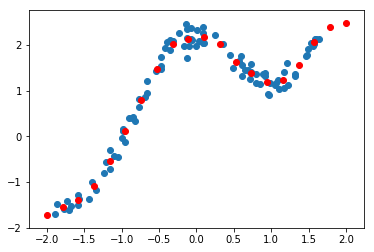

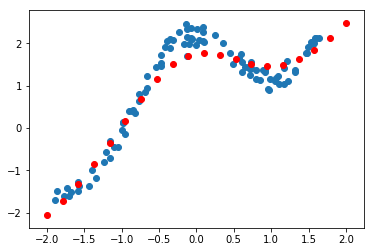

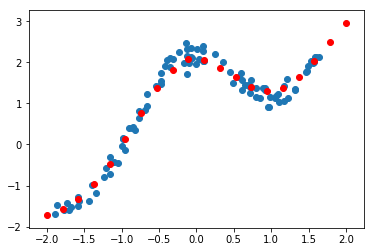

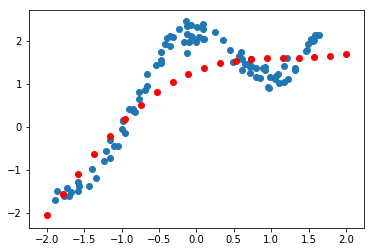

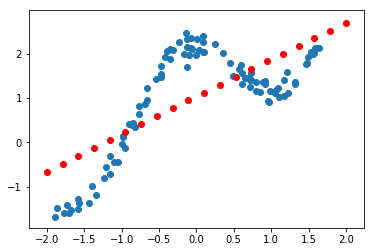

In [10]:
def plotPredictions(tau):
    x_test=np.linspace(-2,2,20)
    y_test=[]
    for ix in x_test:
        theta,pred=getpredictions(X,Y,ix,tau)
        y_test.append(pred[0][0])
    y_test=np.array(y_test)
    xo=np.array(X)
    yo=np.array(Y)
    plt.scatter(xo,yo)
    plt.scatter(x_test,y_test,color='red')
    plt.show()
    
    
tau=[0.1,0.5,0.25,1,10]
for t in tau:
        plotPredictions(t)